### 猫狗分类
---
**data**: 一共选择了4000张图片，比例为8:1:1，两个类的数量一样  
  
**模型训练**：

2. resnet50  
 2.1. 从头开始训练(有归一化，没有数据增强)   
 2.2. 添加数据增强  
 2.3. pre_trained+GlobalAveragePool+FC_1  
 2.4. pre_trained+GlobalAveragePool+FC_256+FC_1  
 2.5. pre_trained+GlobalAveragePool+FC_1024+FC_256+FC_1
 
 

___

#### 2.1 train resnet50 from scratch

In [1]:
from keras.applications import ResNet50
from keras import models

res_model=ResNet50(weights=None,include_top=False,input_shape=(224,224,3))
# res_model.summary()

Using TensorFlow backend.
/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [2]:
from keras import models
from keras import layers
new_res_model=models.Sequential()
new_res_model.add(res_model)
new_res_model.add(layers.GlobalAveragePooling2D())
new_res_model.add(layers.Dense(1,activation='sigmoid',name='fc1000'))
new_res_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
fc1000 (Dense)               (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [3]:
from keras import optimizers

new_res_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

history = new_res_model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 30s 186ms/step - loss: 0.7215 - acc: 0.5797 - val_loss: 0.7457 - val_acc: 0.5225
Epoch 2/30
160/160 [==============================] - 19s 121ms/step - loss: 0.6576 - acc: 0.6319 - val_loss: 0.6633 - val_acc: 0.6500
Epoch 3/30
160/160 [==============================] - 20s 122ms/step - loss: 0.6316 - acc: 0.6506 - val_loss: 1.0787 - val_acc: 0.5100
Epoch 4/30
160/160 [==============================] - 19s 121ms/step - loss: 0.6235 - acc: 0.6597 - val_loss: 0.7256 - val_acc: 0.5775
Epoch 5/30
160/160 [==============================] - 19s 121ms/step - loss: 0.6041 - acc: 0.6681 - val_loss: 0.7928 - val_acc: 0.5625
Epoch 6/30
160/160 [==============================] - 19s 121ms/step - loss: 0.5617 - acc: 0.7153 - val_loss: 0.7566 - val_acc: 0.6125
Epoch 7/30
160/160 [==============================] - 19s 119ms/step - loss: 0.5431 - acc: 0.7259 - val_los

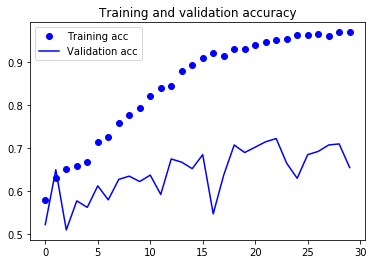

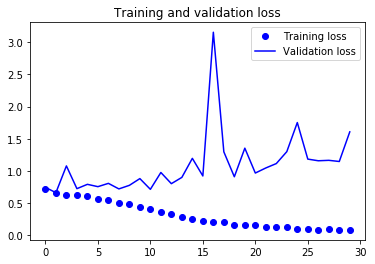

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图2.1  
resnet50也发生了过拟合

#### 2.2 数据增强

In [3]:
from keras import optimizers

new_res_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

history = new_res_model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/100
160/160 [==============================] - 50s 313ms/step - loss: 0.7584 - acc: 0.5656 - val_loss: 1.3135 - val_acc: 0.5500
Epoch 2/100
160/160 [==============================] - 41s 253ms/step - loss: 0.7010 - acc: 0.5825 - val_loss: 0.7366 - val_acc: 0.6075
Epoch 3/100
160/160 [==============================] - 41s 256ms/step - loss: 0.6716 - acc: 0.5997 - val_loss: 1.1236 - val_acc: 0.4975
Epoch 4/100
160/160 [==============================] - 41s 255ms/step - loss: 0.6531 - acc: 0.6256 - val_loss: 0.8484 - val_acc: 0.5750
Epoch 5/100
160/160 [==============================] - 41s 256ms/step - loss: 0.6535 - acc: 0.6181 - val_loss: 0.7568 - val_acc: 0.6050
Epoch 6/100
160/160 [==============================] - 41s 254ms/step - loss: 0.6418 - acc: 0.6350 - val_loss: 0.6508 - val_acc: 0.6225
Epoch 7/100
160/160 [==============================] - 41s 255ms/step - loss: 0.6406 - acc: 0.6350 - 

160/160 [==============================] - 40s 248ms/step - loss: 0.2492 - acc: 0.8937 - val_loss: 0.5127 - val_acc: 0.7900
Epoch 64/100
160/160 [==============================] - 40s 251ms/step - loss: 0.2254 - acc: 0.9097 - val_loss: 0.3656 - val_acc: 0.8400
Epoch 65/100
160/160 [==============================] - 40s 251ms/step - loss: 0.2372 - acc: 0.9016 - val_loss: 0.5204 - val_acc: 0.8150
Epoch 66/100
160/160 [==============================] - 42s 260ms/step - loss: 0.2176 - acc: 0.9078 - val_loss: 0.5603 - val_acc: 0.8150
Epoch 67/100
160/160 [==============================] - 42s 264ms/step - loss: 0.2241 - acc: 0.9034 - val_loss: 0.8684 - val_acc: 0.7625
Epoch 68/100
160/160 [==============================] - 42s 261ms/step - loss: 0.2068 - acc: 0.9119 - val_loss: 0.4716 - val_acc: 0.8225
Epoch 69/100
160/160 [==============================] - 42s 265ms/step - loss: 0.2270 - acc: 0.9062 - val_loss: 0.7556 - val_acc: 0.7450
Epoch 70/100
160/160 [==============================] 

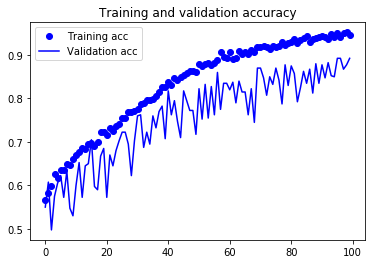

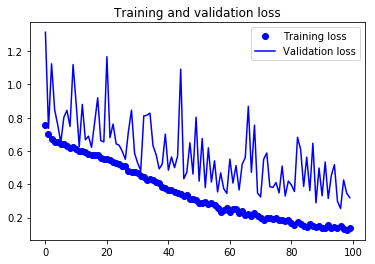

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图2.2 为什么验证集的准确率和loss会存在这么大的波动？

#### 2.3 pre_trained model＋GlobalAveragePool+FC_1(Trainable params: 2,049)

In [2]:
from keras import models
from keras import layers
from keras.applications import ResNet50
res_model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')
res_model.trainable=False

new_res_model=models.Sequential()
new_res_model.add(res_model)
new_res_model.add(layers.GlobalAveragePooling2D())
new_res_model.add(layers.Dense(1,activation='sigmoid',name='fc1000'))
new_res_model.summary()
# new_res_model.summary()

/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
fc1000 (Dense)               (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [3]:
from keras import optimizers

new_res_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

history = new_res_model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 42s 265ms/step - loss: 0.5401 - acc: 0.7500 - val_loss: 0.7768 - val_acc: 0.5000
Epoch 2/30
160/160 [==============================] - 40s 248ms/step - loss: 0.3447 - acc: 0.8847 - val_loss: 0.8317 - val_acc: 0.5000
Epoch 3/30
160/160 [==============================] - 39s 247ms/step - loss: 0.2662 - acc: 0.9109 - val_loss: 0.8900 - val_acc: 0.5000
Epoch 4/30
160/160 [==============================] - 40s 253ms/step - loss: 0.2306 - acc: 0.9131 - val_loss: 0.9138 - val_acc: 0.5000
Epoch 5/30
160/160 [==============================] - 40s 252ms/step - loss: 0.2017 - acc: 0.9356 - val_loss: 0.9464 - val_acc: 0.5000
Epoch 6/30
160/160 [==============================] - 40s 250ms/step - loss: 0.1860 - acc: 0.9391 - val_loss: 0.9725 - val_acc: 0.5000
Epoch 7/30
160/160 [==============================] - 40s 252ms/step - loss: 0.1727 - acc: 0.9416 - val_los

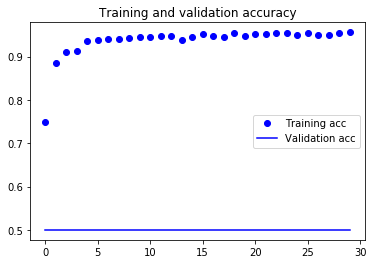

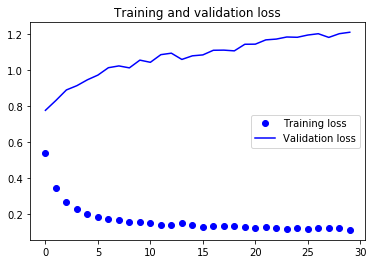

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图 2.3  
validation acc 没有上升，validation loss一直在增加，很可能是因为resnet50顶层就只有一个全局平均池化层和全连接层，要学习的参数是很少的，这样可能很难学习到图片的特征  
为什么train的准确率可以达到那么高，而validation的loss确一直这么低？

#### 2.4 pre_trained model +FC_256+FC_1(Trainable params: 524,801)

In [2]:
from keras import models
from keras import layers
from keras.applications import ResNet50
res_model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')
res_model.trainable=False

new_res_model=models.Sequential()
new_res_model.add(res_model)
new_res_model.add(layers.GlobalAveragePooling2D())
new_res_model.add(layers.Dense(256,activation='relu'))


new_res_model.add(layers.Dense(1,activation='sigmoid',name='fc1000'))
new_res_model.summary()

/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
fc1000 (Dense)               (None, 1)                 257       
Total params: 24,112,513
Trainable params: 524,801
Non-trainable params: 23,587,712
_________________________________________________________________


In [3]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

new_res_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')


checkpoint=ModelCheckpoint('./models/resnet50.hdf5',monitor='val_acc',save_best_only=True)
history = new_res_model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,callbacks=[checkpoint])


Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/30
160/160 [==============================] - 43s 270ms/step - loss: 0.2698 - acc: 0.8837 - val_loss: 1.2981 - val_acc: 0.5000
Epoch 2/30
160/160 [==============================] - 40s 251ms/step - loss: 0.1541 - acc: 0.9434 - val_loss: 1.3448 - val_acc: 0.5000
Epoch 3/30
160/160 [==============================] - 40s 252ms/step - loss: 0.1416 - acc: 0.9366 - val_loss: 1.4847 - val_acc: 0.5000
Epoch 4/30
160/160 [==============================] - 42s 262ms/step - loss: 0.1227 - acc: 0.9494 - val_loss: 1.3621 - val_acc: 0.5000
Epoch 5/30
160/160 [==============================] - 40s 249ms/step - loss: 0.1239 - acc: 0.9544 - val_loss: 1.3407 - val_acc: 0.5000
Epoch 6/30
160/160 [==============================] - 41s 254ms/step - loss: 0.1192 - acc: 0.9512 - val_loss: 1.5789 - val_acc: 0.5000
Epoch 7/30
160/160 [==============================] - 41s 254ms/step - loss: 0.1203 - acc: 0.9500 - val_los

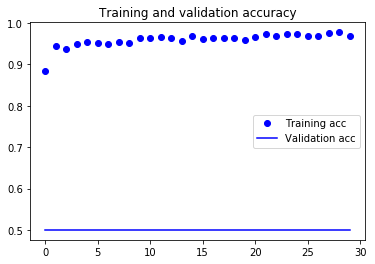

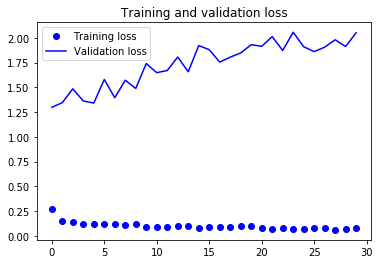

In [5]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

图2.4  
与图2.3相比较，validation的loss值更大

#### 2.5 pre_trained model+FC_256+FC_1(卷积层中的某些层也参与了学习)

In [6]:
from keras import models
from keras import layers
from keras.applications import ResNet50
res_model=ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')
# res_model.trainable=False


new_res_model=models.Sequential()
new_res_model.add(res_model)
new_res_model.add(layers.GlobalAveragePooling2D())


new_res_model.add(layers.Dense(256,activation='relu'))
# new_res_model.add(layers.Dense(,activation='relu'))

new_res_model.add(layers.Dense(1,activation='sigmoid',name='fc1000'))
new_res_model.summary()
res_model.summary()

/usr/local/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
fc1000 (Dense)               (None, 1)                 257       
Total params: 24,112,513
Trainable params: 24,059,393
Non-trainable params: 53,120
_________________________________________________________________
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0     

In [7]:
res_model.trainable = True

set_trainable = False
for layer in res_model.layers:
    if layer.name == 'bn5a_branch2b':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
new_res_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               524544    
_________________________________________________________________
fc1000 (Dense)               (None, 1)                 257       
Total params: 24,112,513
Trainable params: 12,615,169
Non-trainable params: 11,497,344
_________________________________________________________________


In [8]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

new_res_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


# All images will be rescaled by 1./255

train_dir='./cats_and_dogs_small/train'
validation_dir='./cats_and_dogs_small/validation'
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')


checkpoint=ModelCheckpoint('./models/resnet50_2.5.hdf5',monitor='val_acc',save_best_only=True,verbose=1)
history = new_res_model.fit_generator(
      train_generator,
      steps_per_epoch=160,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=20,callbacks=[checkpoint])

Found 3200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/50
160/160 [==============================] - 45s 280ms/step - loss: 0.1649 - acc: 0.9322 - val_loss: 0.2205 - val_acc: 0.9725

Epoch 00001: val_acc improved from -inf to 0.97250, saving model to ./models/resnet50_2.5.hdf5
Epoch 2/50
160/160 [==============================] - 39s 244ms/step - loss: 0.0965 - acc: 0.9650 - val_loss: 0.3220 - val_acc: 0.9625

Epoch 00002: val_acc did not improve from 0.97250
Epoch 3/50
160/160 [==============================] - 39s 246ms/step - loss: 0.0907 - acc: 0.9653 - val_loss: 0.2639 - val_acc: 0.9650

Epoch 00003: val_acc did not improve from 0.97250
Epoch 4/50
160/160 [==============================] - 39s 246ms/step - loss: 0.0735 - acc: 0.9747 - val_loss: 0.2313 - val_acc: 0.9750

Epoch 00004: val_acc improved from 0.97250 to 0.97500, saving model to ./models/resnet50_2.5.hdf5
Epoch 5/50
160/160 [==============================] - 39s 244ms/step - loss: 0.0

160/160 [==============================] - 40s 250ms/step - loss: 0.0103 - acc: 0.9975 - val_loss: 0.0861 - val_acc: 0.9775

Epoch 00043: val_acc did not improve from 0.98500
Epoch 44/50
160/160 [==============================] - 41s 254ms/step - loss: 0.0123 - acc: 0.9962 - val_loss: 0.1504 - val_acc: 0.9750

Epoch 00044: val_acc did not improve from 0.98500
Epoch 45/50
160/160 [==============================] - 40s 251ms/step - loss: 0.0071 - acc: 0.9978 - val_loss: 0.1415 - val_acc: 0.9825

Epoch 00045: val_acc did not improve from 0.98500
Epoch 46/50
160/160 [==============================] - 40s 250ms/step - loss: 0.0123 - acc: 0.9959 - val_loss: 0.1787 - val_acc: 0.9800

Epoch 00046: val_acc did not improve from 0.98500
Epoch 47/50
160/160 [==============================] - 40s 251ms/step - loss: 0.0147 - acc: 0.9953 - val_loss: 0.1217 - val_acc: 0.9775

Epoch 00047: val_acc did not improve from 0.98500
Epoch 48/50
160/160 [==============================] - 40s 250ms/step - loss:

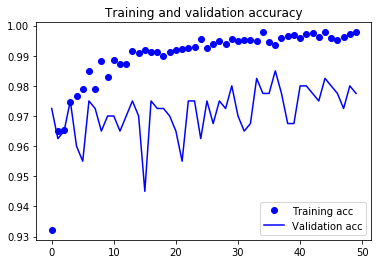

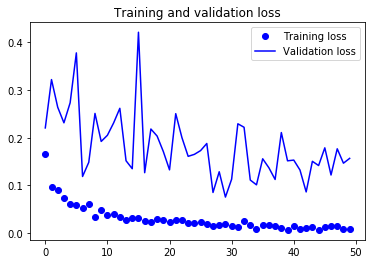

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_generator=test_datagen.flow_from_directory('./cats_and_dogs_small/test',target_size=(224,224))
new_res_model.load_weights('./models/resnet50_2.5.hdf5')
# new_res_model.evaluate_generator(test_generator,steps=20)

Found 400 images belonging to 2 classes.
